In [785]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [786]:
df = pd.read_csv('laptop_data.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
pd.set_option('display.max_columns',None)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### info

In [787]:
df.shape

(1303, 11)

In [788]:
# df.isnull().sum()
df.duplicated().sum()

np.int64(29)

In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


### Company	TypeName Inches

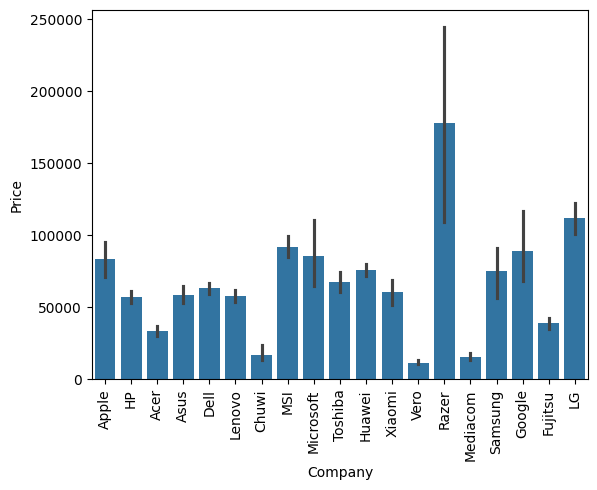

In [790]:
# df['Company'].value_counts()
sns.barplot(data=df,x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

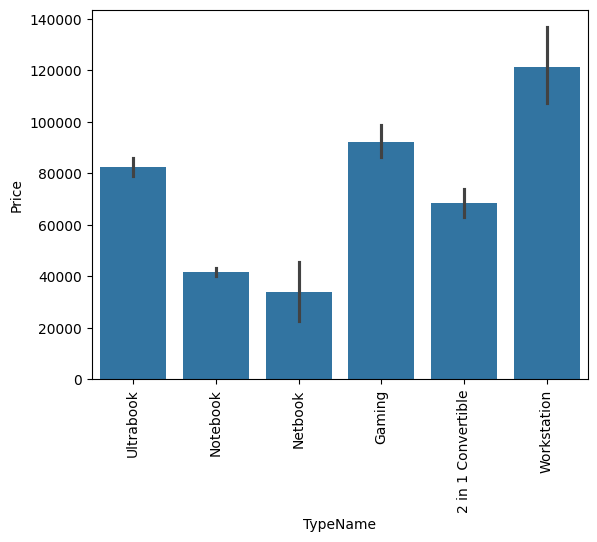

In [791]:
# df['TypeName'].value_counts()
sns.barplot(data=df,x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

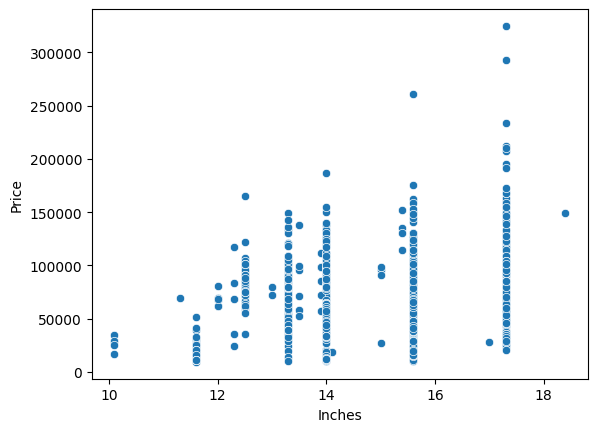

In [792]:
sns.scatterplot(x = df['Inches'],y = df['Price'])

In [793]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<Axes: xlabel='Inches', ylabel='Count'>

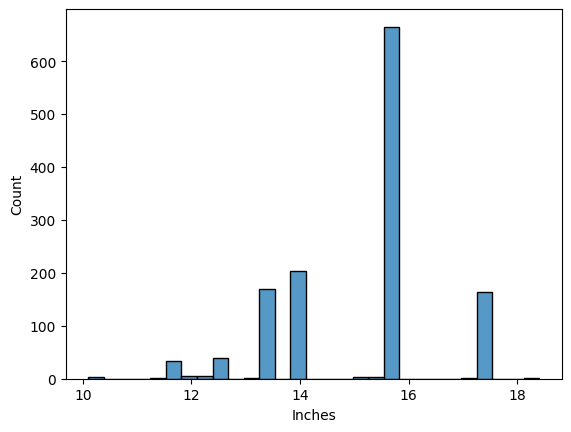

In [794]:
sns.histplot(df['Inches'])

### ScreenResolution

In [795]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [796]:
df['ScreenResolution'].str.split().str[-1]

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [797]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 
                                                      if 'Touchscreen' in x else 0)

df['IPS'] = df['ScreenResolution'].apply(lambda x:1 
                                                      if 'IPS' in x else 0)


df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
# df['Resolution'] = df['ScreenResolution'].str.split().str[-1]

# df[['Width','Height']] = df['Resolution'].str.split('x', expand=True)
# df[['Width','Height']] = df[['Width','Height']].astype(int)
df[['Width','Height']] = (df['Resolution'].str.extract(r'(\d+)x(\d+)').astype(int))


# df.drop(columns=['Resolution','ScreenResolution'],axis=1,inplace=True)

In [798]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Resolution,Width,Height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560x1600,2560,1600


In [799]:
df['ScreenResolution'].apply(lambda x: 1 if x in 'IPS' else 0)
df['ScreenResolution'].apply(lambda x: 1 if x in 'Touchscreen' else 0)


0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: ScreenResolution, Length: 1303, dtype: int64

In [800]:
df.drop(columns=['Resolution','ScreenResolution'],axis=1,inplace=True)


In [801]:
df['TouchScreen'].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

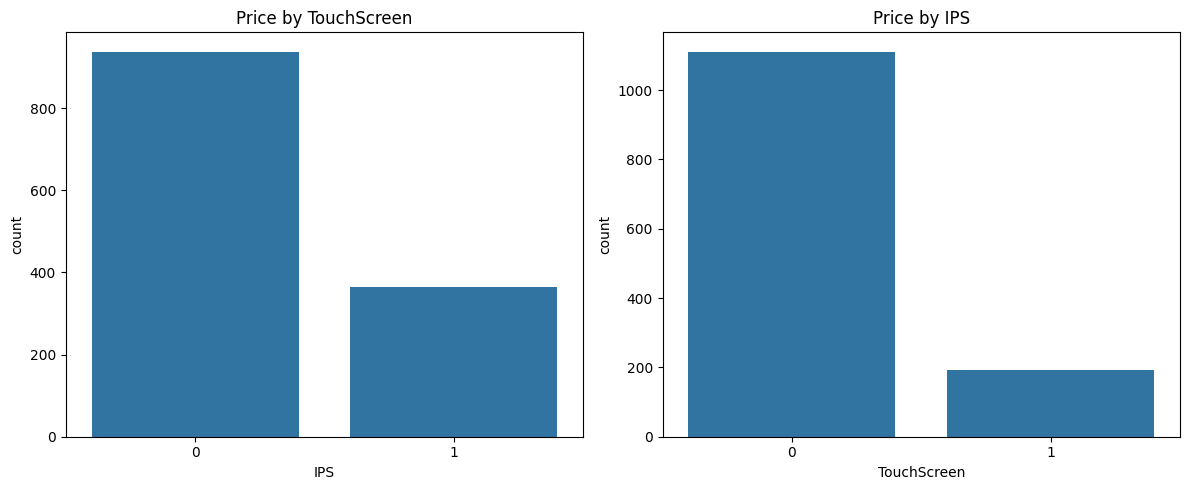

In [802]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 cols

# TouchScreen vs Price
sns.barplot(df['IPS'].value_counts(), ax=axes[0])
axes[0].set_title("Price by TouchScreen")

# IPS vs Price
sns.barplot(df['TouchScreen'].value_counts(), ax=axes[1])
axes[1].set_title("Price by IPS")

plt.tight_layout()
plt.show()

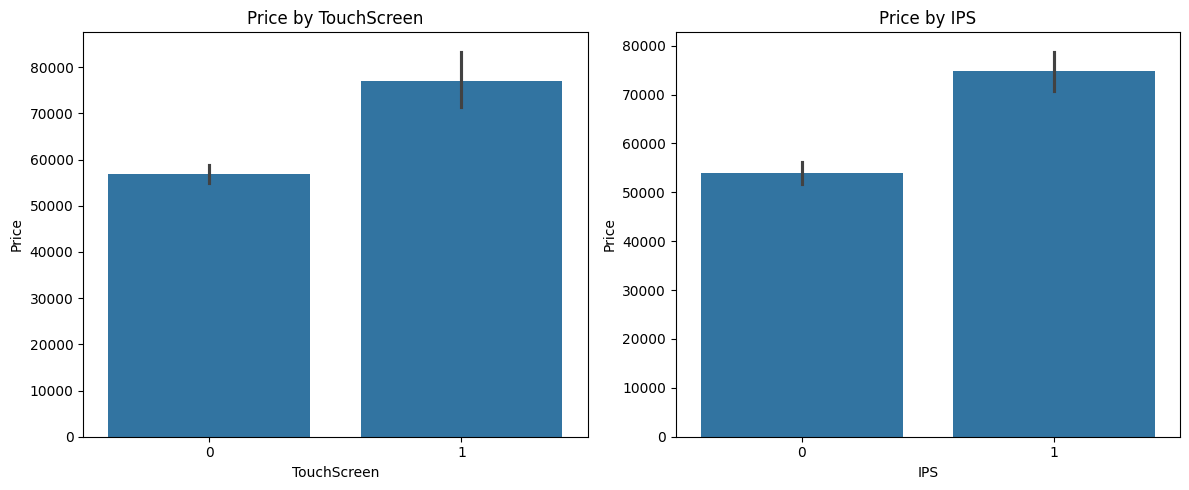

In [803]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 cols

# TouchScreen vs Price
sns.barplot(x='TouchScreen', y='Price', data=df, ax=axes[0])
axes[0].set_title("Price by TouchScreen")

# IPS vs Price
sns.barplot(x='IPS', y='Price', data=df, ax=axes[1])
axes[1].set_title("Price by IPS")

plt.tight_layout()
plt.show()

In [804]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
Width          0.556529
Height         0.552809
Name: Price, dtype: float64

In [805]:
# PPI calculation
df['PPI'] = (((df['Width']**2 + df['Height']**2) ** 0.5) / df['Inches']).round(2)

In [806]:
df.corr(numeric_only=True)['Price']


Inches         0.068197
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
Width          0.556529
Height         0.552809
PPI            0.473506
Name: Price, dtype: float64

In [807]:
df.drop(columns=['Inches','Width','Height'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.98
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.68
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.21
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.53
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.98


### Cpu

In [808]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [809]:
# df['Cpu'].str.split().str[:3].str.join(" ")
cpu = df['Cpu'].str.split().str[:3].str.join(' ').str.lower()
cpu.value_counts()

Cpu
intel core i7               527
intel core i5               423
intel core i3               136
intel celeron dual           80
intel pentium quad           27
intel core m                 19
amd a9-series 9420           12
amd a6-series 9220            8
intel celeron quad            8
amd a12-series 9720p          7
intel atom x5-z8350           7
intel atom x5-z8550           4
amd a8-series 7410            4
intel pentium dual            3
amd ryzen 1700                3
amd a9-series 9410            3
amd e-series e2-9000e         2
amd a10-series 9600p          2
intel xeon e3-1535m           2
amd a10-series 9620p          2
amd a6-series a6-9220         2
amd a10-series a10-9620p      2
intel xeon e3-1505m           2
amd e-series 7110             2
amd a9-series a9-9420         2
amd e-series 6110             1
amd fx 9830p                  1
amd e-series e2-6110          1
amd e-series 9000e            1
intel atom x5-z8300           1
amd ryzen 1600                1
amd 

In [810]:
# Cpu = np.where(
#     df['Cpu'].str.lower().str.contains('intel core'), 'Intel Core',
#     np.where(
#         df['Cpu'].str.lower().str.contains('intel'), 'Other Intel',
#         np.where(
#             df['Cpu'].str.lower().str.contains('amd'), 'AMD',
#             'Other'
#         )
#     )
# )


df['Cpu_Brand'] = np.where(
    df['Cpu'].str.lower().str.contains(r'intel core i3'), 'Intel Core i3',
    np.where(
        df['Cpu'].str.lower().str.contains(r'intel core i5'), 'Intel Core i5',
        np.where(
            df['Cpu'].str.lower().str.contains(r'intel core i7'), 'Intel Core i7',
            np.where(
                df['Cpu'].str.lower().str.contains(r'intel'), 'Other Intel',
                np.where(
                    df['Cpu'].str.lower().str.contains(r'amd'), 'AMD',
                    'Other'
                )
            )
        )
    )
)

df[['Cpu','Cpu_Brand']].head()

,Cpu,Cpu_Brand
0,Intel Core i5 2.3GHz,Intel Core i5
1,Intel Core i5 1.8GHz,Intel Core i5
2,Intel Core i5 7200U 2.5GHz,Intel Core i5
3,Intel Core i7 2.7GHz,Intel Core i7
4,Intel Core i5 3.1GHz,Intel Core i5


In [811]:
df.drop(columns=["Cpu"],inplace=True)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.98,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.68,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.21,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.53,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.98,Intel Core i5


In [812]:
df['Cpu_Brand'].value_counts()

Cpu_Brand
Intel Core i7    527
Intel Core i5    423
Other Intel      154
Intel Core i3    136
AMD               62
Other              1
Name: count, dtype: int64

<Axes: xlabel='Cpu_Brand', ylabel='count'>

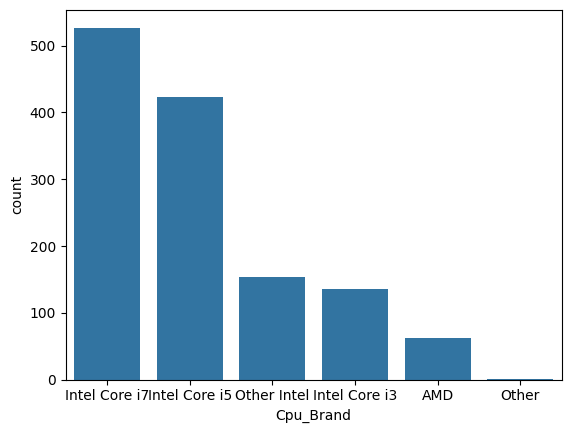

In [813]:
sns.barplot(df['Cpu_Brand'].value_counts())

In [814]:
cpu_map = {
    'Intel Core i3': 3,
    'Intel Core i5': 5,
    'Intel Core i7': 7,
    'Other Intel': 1,
    'AMD': 2,
    'Other': 0
}

df['Cpu_Brand'] = df['Cpu_Brand'].map(cpu_map)
df['Cpu_Brand'].head()

0    5
1    5
2    5
3    7
4    5
Name: Cpu_Brand, dtype: int64

In [815]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.98,5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.68,5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.21,5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.53,7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.98,5


<Axes: xlabel='Cpu_Brand', ylabel='Count'>

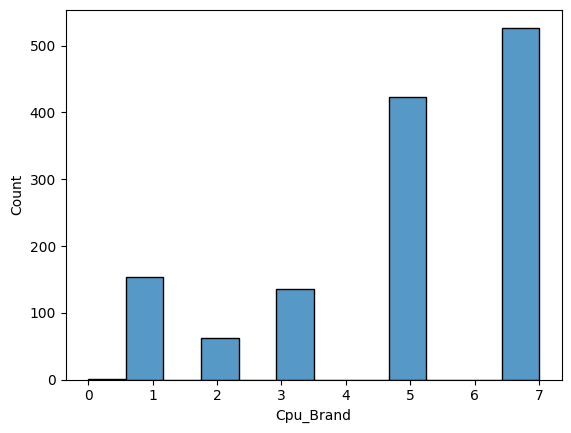

In [816]:
sns.histplot(df['Cpu_Brand'])

<Axes: xlabel='Cpu_Brand', ylabel='Price'>

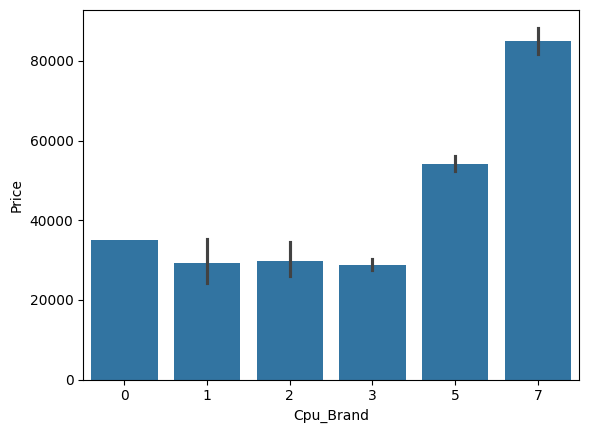

In [817]:
sns.barplot(data=df,x=df['Cpu_Brand'],y=df['Price'])

In [818]:
df[df['Cpu_Brand']==0]

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand
1191,Samsung,2 in 1 Convertible,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,35111.52,1,1,234.51,0


In [819]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.98,5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.68,5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.21,5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.53,7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.98,5


### Ram, Weight

In [820]:
df['Ram'] = df['Ram'].str.replace('GB','').str.strip()
df['Weight'] = df['Weight'].str.replace('kg','').str.strip()

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')


In [821]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,5


### Memory

In [822]:

df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [823]:
df['Memory'].str.split('+')

0                 [128GB SSD]
1       [128GB Flash Storage]
2                 [256GB SSD]
3                 [512GB SSD]
4                 [256GB SSD]
                ...          
1298              [128GB SSD]
1299              [512GB SSD]
1300     [64GB Flash Storage]
1301                [1TB HDD]
1302              [500GB HDD]
Name: Memory, Length: 1303, dtype: object

In [824]:
# import re

# # Step 1: Remove .0, GB, TB
# df['Memory'] = df['Memory'].astype(str).replace('\.0','', regex=True)
# df['Memory'] = df['Memory'].str.replace('GB','', regex=False)
# df['Memory'] = df['Memory'].str.replace('TB','000', regex=False)

# # Step 2: Split by '+' (combo storage)
# memory_split = df['Memory'].str.split("+", n=1, expand=True).apply(lambda x: x.str.strip())

# # Step 3: Extract numeric value from each part
# memory_split[0] = memory_split[0].str.extract(r'(\d+)').astype(int)
# memory_split[1] = memory_split[1].str.extract(r'(\d+)')  # second part may be NaN
# memory_split[1] = memory_split[1].fillna(0).astype(int)

# # Step 4: Create main memory numeric columns
# df['Memory_Num_Max'] = memory_split.max(axis=1)      # maximum memory
# df['Memory_Num_Total'] = memory_split.sum(axis=1)    # total memory

# # Step 5: Extract type (SSD / HDD / FLASH / HYBRID)
# def extract_memory_types(mem_str):
#     types = re.findall(r'(SSD|HDD|FLASH|HYBRID)', mem_str.upper())
#     return types if types else ['Other']

# memory_types = df['Memory'].apply(extract_memory_types)

# # Step 6: Create boolean columns for each type
# for t in ['SSD','HDD','FLASH','HYBRID']:
#     df[f'Memory_{t}'] = memory_types.apply(lambda x: int(t in x))

# # Step 7: Drop temporary / unnecessary columns
# df.drop(columns=['Memory'], inplace=True)

# # Check final dataframe
# df.head()

In [825]:
import re

# Step 1: Clean Memory column
df['Memory'] = df['Memory'].astype(str).replace('\.0','', regex=True)
df['Memory'] = df['Memory'].str.replace('GB','', regex=False)
df['Memory'] = df['Memory'].str.replace('TB','000', regex=False)

# Step 2: Split combo storage
memory_split = df['Memory'].str.split("+", n=1, expand=True).apply(lambda x: x.str.strip())
df['first_split'] = memory_split[0]
df['second_split'] = memory_split[1].fillna("")  # empty string if no second part

# Step 3: Extract numeric values
df['first'] = df['first_split'].str.extract(r'(\d+)').astype(int)
df['second'] = df['second_split'].str.extract(r'(\d+)').fillna(0).astype(int)

# Max and total memory
# df['Memory_Num_Max'] = df[['Memory_Num_1','Memory_Num_2']].max(axis=1)
# df['Memory_Num_Total'] = df[['Memory_Num_1','Memory_Num_2']].sum(axis=1)

# Step 4: Extract types separately
def extract_memory_types(mem_str):
    types = re.findall(r'(SSD|HDD|FLASH|HYBRID)', mem_str.upper())
    return types if types else ['Other']

# First split types
types_1 = df['first_split'].apply(extract_memory_types)
for t in ['SSD','HDD','FLASH','HYBRID']:
    df[f'Memory_1_{t}'] = types_1.apply(lambda x: int(t in x))

# Second split types
types_2 = df['second_split'].apply(extract_memory_types)
for t in ['SSD','HDD','FLASH','HYBRID']:
    df[f'Memory_2_{t}'] = types_2.apply(lambda x: int(t in x))

# Step 5: Drop temporary columns if needed
df.drop(columns=['first_split','second_split'], inplace=True)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_20767/964800924.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0','', regex=True)


In [826]:
memory_split

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [827]:
df['second'].value_counts()

second
0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [828]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,first,second,Memory_1_SSD,Memory_1_HDD,Memory_1_FLASH,Memory_1_HYBRID,Memory_2_SSD,Memory_2_HDD,Memory_2_FLASH,Memory_2_HYBRID
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,5,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,5,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,5,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,7,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,5,256,0,1,0,0,0,0,0,0,0


In [829]:
# Create final memory type numeric columns
df["HDD"]=(df["first"]*df["Memory_1_HDD"] + df["second"]*df["Memory_2_HDD"])
df["SSD"]=(df["first"]*df["Memory_1_SSD"] + df["second"]*df["Memory_2_SSD"])
df["Hybrid"]=(df["first"]*df["Memory_1_HYBRID"] + df["second"]*df["Memory_2_HYBRID"])
df["Flash_St"]=(df["first"]*df["Memory_1_FLASH"] +df["second"]*df["Memory_2_FLASH"])

# Drop unnecessary columns
df.drop(columns=['first', 'second','Memory','Hybrid','Flash_St',
                'Memory_1_HDD', 'Memory_2_HDD', 
                'Memory_1_SSD','Memory_2_SSD',
                'Memory_1_HYBRID', 'Memory_2_HYBRID', 
                'Memory_1_FLASH', 'Memory_2_FLASH'
                ],
                inplace=True)

df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,5,0,256


### GPU Brand

In [831]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

<Axes: ylabel='Gpu'>

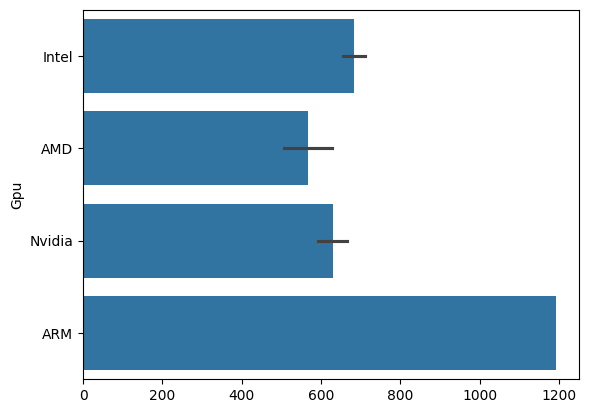

In [832]:
sns.barplot(df['Gpu'].str.split().str[0])

/tmp/ipykernel_20767/1302849845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gpu'],palette='plasma')


<Axes: xlabel='Gpu', ylabel='count'>

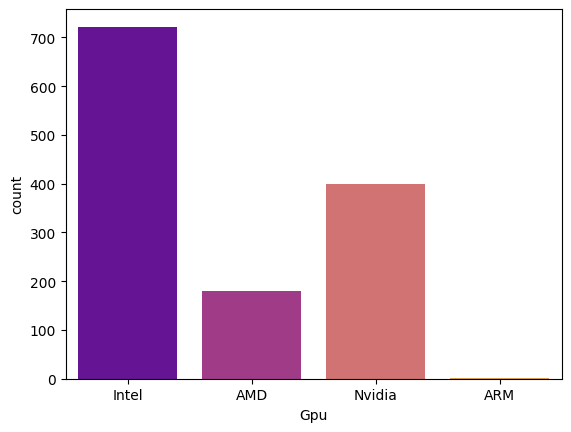

In [833]:
df['Gpu'] = df['Gpu'].str.split().str[0]
sns.countplot(x=df['Gpu'],palette='plasma')


In [834]:
df['Gpu'].apply(lambda x:x.split()[0])

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1303, dtype: object

In [835]:
df[df['Gpu'] == 'ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD
1191,Samsung,2 in 1 Convertible,4,ARM,Chrome OS,1.15,35111.52,1,1,234.51,0,0,0


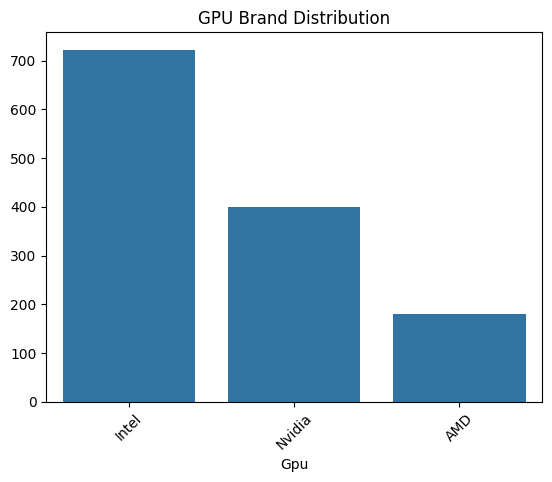

In [836]:
df = df[df['Gpu']!='ARM']
sns.barplot(x=df['Gpu'].value_counts().index,
            y=df['Gpu'].value_counts().values)

plt.title("GPU Brand Distribution")
plt.xticks(rotation=45)
plt.show()

In [837]:
gpu_map = {
    'Intel': 0,
    'AMD': 1,
    'Nvidia': 2
}

df['Gpu'] = df['Gpu'].map(gpu_map)

In [838]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,0,macOS,1.37,71378.6832,0,1,226.98,5,0,128
1,Apple,Ultrabook,8,0,macOS,1.34,47895.5232,0,0,127.68,5,0,0
2,HP,Notebook,8,0,No OS,1.86,30636.0000,0,0,141.21,5,0,256
3,Apple,Ultrabook,16,1,macOS,1.83,135195.3360,0,1,220.53,7,0,512
4,Apple,Ultrabook,8,0,macOS,1.37,96095.8080,0,1,226.98,5,0,256


### Os-System

In [839]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

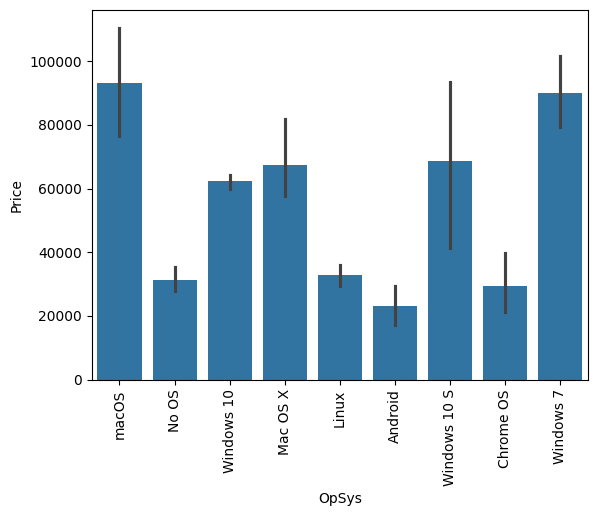

In [840]:
sns.barplot(data= df,x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [841]:
df['OpSys'] = np.where(df['OpSys'].str.contains('Windows', case=False), 'Windows',
                     np.where(df['OpSys'].str.contains('Mac', case=False), 'Mac',
                              'Other'))

In [842]:
os_map = {
    'Windows': 0,
    'Mac': 1,
    'Other': 2
}

df['OpSys'] = df['OpSys'].map(os_map)

In [843]:
df.Gpu.value_counts()

Gpu
0    722
2    400
1    180
Name: count, dtype: int64

In [844]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,0,1,1.37,71378.6832,0,1,226.98,5,0,128
1,Apple,Ultrabook,8,0,1,1.34,47895.5232,0,0,127.68,5,0,0
2,HP,Notebook,8,0,2,1.86,30636.0000,0,0,141.21,5,0,256
3,Apple,Ultrabook,16,1,1,1.83,135195.3360,0,1,220.53,7,0,512
4,Apple,Ultrabook,8,0,1,1.37,96095.8080,0,1,226.98,5,0,256


<Axes: xlabel='OpSys', ylabel='count'>

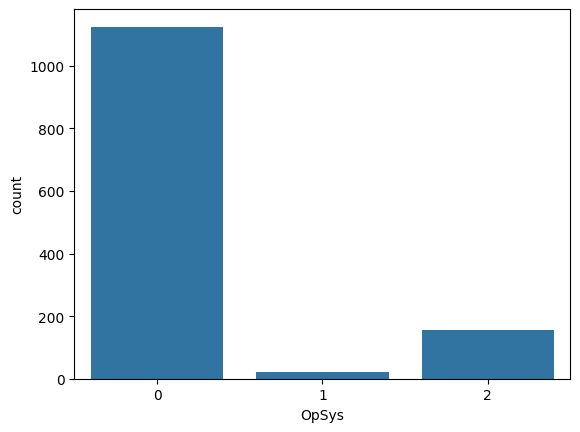

In [845]:
sns.countplot(x=df['OpSys'])


<Axes: xlabel='Weight', ylabel='Count'>

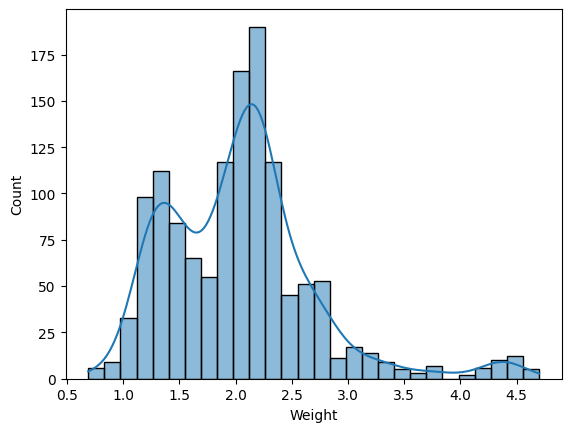

In [846]:
sns.histplot(df['Weight'],kde=True)

### Price

<Axes: xlabel='Price', ylabel='Count'>

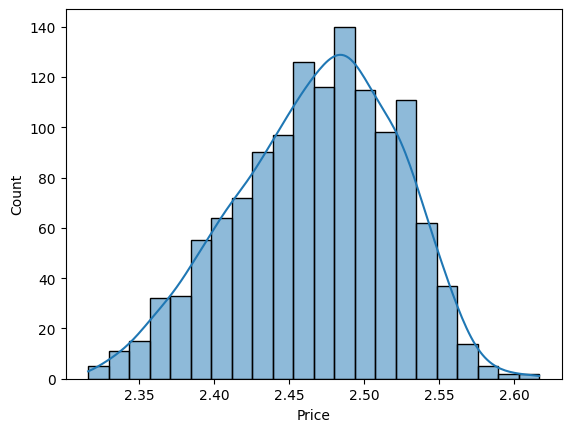

In [847]:
df['Price'] = np.log1p(df['Price'])
sns.histplot(np.log1p(df['Price']),kde=True)


In [848]:
df.corr(numeric_only=True)['Price']

Ram            0.684713
Gpu            0.296700
OpSys         -0.318393
Weight         0.151223
Price          1.000000
TouchScreen    0.197957
IPS            0.282946
PPI            0.484856
Cpu_Brand      0.735342
HDD           -0.092429
SSD            0.659566
Name: Price, dtype: float64

In [849]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,0,1,1.37,11.175769,0,1,226.98,5,0,128
1,Apple,Ultrabook,8,0,1,1.34,10.776798,0,0,127.68,5,0,0
2,HP,Notebook,8,0,2,1.86,10.329964,0,0,141.21,5,0,256
3,Apple,Ultrabook,16,1,1,1.83,11.814483,0,1,220.53,7,0,512
4,Apple,Ultrabook,8,0,1,1.37,11.473111,0,1,226.98,5,0,256


#### data save for prediction

In [850]:
test = df['Price']
train = df.drop(['Price'],axis = 1)
train.to_csv('train-data.csv',index=None)
df.to_csv('data.csv',index=None)

<Axes: >

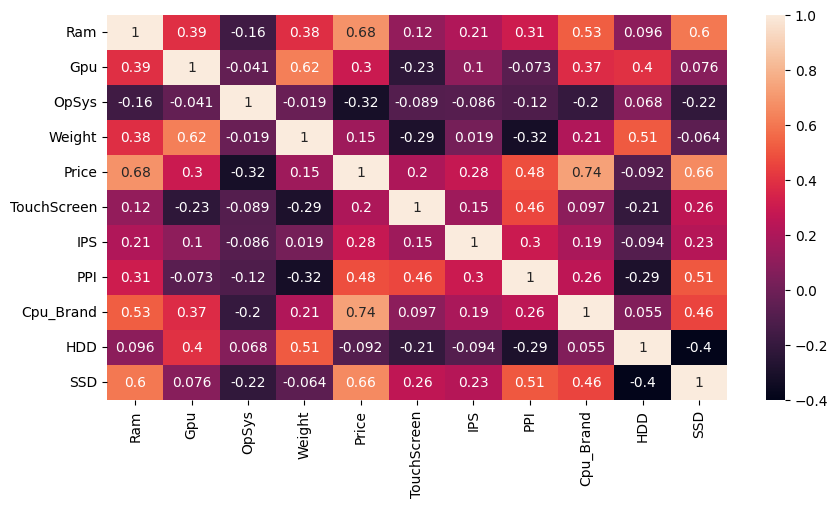

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Company TypeName

In [ ]:
df = pd.get_dummies(df, columns=['Company','TypeName'])

In [ ]:
df.head()

,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,8,0,1,1.37,11.175769,0,1,226.98,5,0,128,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,8,0,1,1.34,10.776798,0,0,127.68,5,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,8,0,2,1.86,10.329964,0,0,141.21,5,0,256,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,16,1,1,1.83,11.814483,0,1,220.53,7,0,512,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,8,0,1,1.37,11.473111,0,1,226.98,5,0,256,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


### model & train-test-split

In [ ]:
y = df['Price']
x = df.drop(['Price'],axis = 1)

In [ ]:
x

,Ram,Gpu,OpSys,Weight,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,8,0,1,1.37,0,1,226.98,5,0,128,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,8,0,1,1.34,0,0,127.68,5,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,8,0,2,1.86,0,0,141.21,5,0,256,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,16,1,1,1.83,0,1,220.53,7,0,512,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,8,0,1,1.37,0,1,226.98,5,0,256,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,0,0,1.80,1,1,157.35,7,0,128,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1299,16,0,0,1.30,1,1,276.05,7,0,512,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1300,2,0,0,1.50,0,0,111.94,1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1301,6,1,0,2.19,0,0,100.45,7,1000,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 35), (196, 35))

#### LinearRegression

In [ ]:
lr = LinearRegression()


lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.802942330131926
MAE 0.21119286382268992


In [ ]:
np.exp(0.21)


np.float64(1.2336780599567432)

#### DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('dt',dt)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8468269623679054
MAE 0.180833956598744


#### GradientBoostingRegressor

In [ ]:
rf = GradientBoostingRegressor(n_estimators=500,
                              random_state=3)

pipe = Pipeline([
    ('rf',rf)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8825901891410741
MAE 0.15572605582010074


#### RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('rf',rf)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8903998734086217
MAE 0.15710527326678123


#### XGBRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics

from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=50,
    early_stopping_rounds=50,
    random_state=42
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

y_pred = xgb.predict(X_test)

print("R2:", metrics.r2_score(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("Best iteration:", xgb.best_iteration)
print("Best score:", xgb.best_score)

R2: 0.8979155368753865
MAE: 0.1455365946445626
Best iteration: 32
Best score: 0.19761175404219145


In [ ]:
import joblib

joblib.dump(xgb, "xgb_model.pkl")
model = joblib.load("xgb_model.pkl")

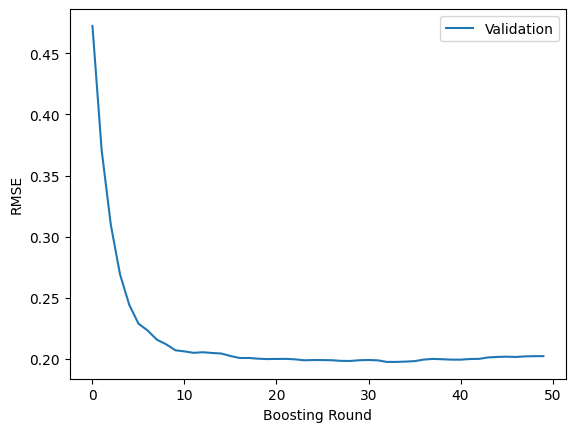

In [ ]:
import matplotlib.pyplot as plt

results = xgb.evals_result()

plt.plot(results['validation_0']['rmse'], label='Validation')
plt.xlabel("Boosting Round")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Best estimator: 49
Best estimator: 74
Best estimator: 99
Best estimator: 124
Best estimator: 149
Best estimator: 174
Best estimator: 199
Best estimator: 224
Best estimator: 249
Best estimator: 267
Best estimator: 284
Best estimator: 284
Best estimator: 284
Best estimator: 284
Best estimator: 284
Best estimator: 284
Best estimator: 284
Best estimator: 284


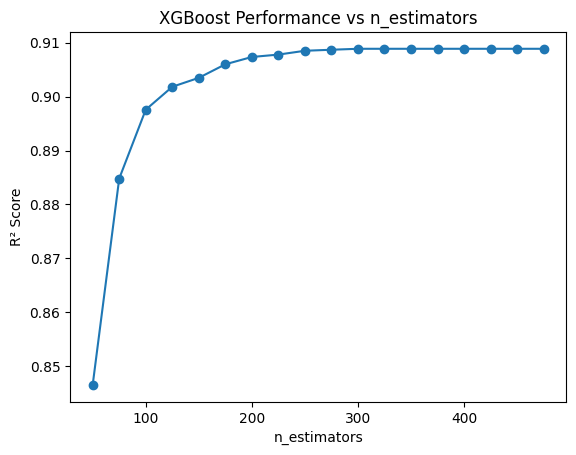

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

n_estimators_range = range(50, 500, 25)
r2_scores = []

for n in n_estimators_range:

    model = XGBRegressor(
    n_estimators=n,
    learning_rate=0.034,
    max_depth=7,
    subsample=0.67,
    colsample_bytree=0.606,
    early_stopping_rounds=50,
        random_state=42
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )

    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    r2_scores.append(r2)
    

# plot
plt.plot(n_estimators_range, r2_scores, marker='o')
plt.xlabel("n_estimators")
plt.ylabel("R² Score")
plt.title("XGBoost Performance vs n_estimators")
plt.show()


In [ ]:
print("Best estimator:", model.best_iteration)

Best estimator: 284


In [ ]:
r2_scores

[0.8466047891938214,
 0.8848092559349146,
 0.8975616721079946,
 0.9018037802435623,
 0.9034602368964522,
 0.9059688571161088,
 0.9073233664887923,
 0.9077655871378612,
 0.9084736370388637,
 0.9086645611775683,
 0.9088428249229186,
 0.9088428249229186,
 0.9088428249229186,
 0.9088428249229186,
 0.9088428249229186,
 0.9088428249229186,
 0.9088428249229186,
 0.9088428249229186]

### optuna GradientBoostingRegressor

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators",250,380),
        "max_depth": trial.suggest_int("max_depth", 7, 9),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.05),
        "subsample": trial.suggest_float("subsample", 0.6, 0.7),
        # "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.7),
        "random_state": 42
    }

    model = GradientBoostingRegressor(**params,)

    # 3-fold cross-validation R²
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean()

    return score  # Optuna maximizes R²


study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())

study.optimize(objective, n_trials=30)  # Increase n_trials for more precise tuning

print("Best R²:", study.best_value)
print("Best Hyperparameters:", study.best_params)


best_xgb = GradientBoostingRegressor(**study.best_params,)
best_xgb.fit(X_train, y_train)


y_pred = best_xgb.predict(X_test)


print("R2:", r2_score(y_test,y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))


[I 2026-02-21 21:05:03,050] A new study created in memory with name: no-name-f0f901a0-1ebf-40bf-b2a0-94cfa54cc4bf


[I 2026-02-21 21:05:11,838] Trial 0 finished with value: 0.8875860674186485 and parameters: {'n_estimators': 359, 'max_depth': 7, 'learning_rate': 0.03217518019205702, 'subsample': 0.6766717390313175}. Best is trial 0 with value: 0.8875860674186485.
[I 2026-02-21 21:05:16,751] Trial 1 finished with value: 0.8821402037405175 and parameters: {'n_estimators': 284, 'max_depth': 9, 'learning_rate': 0.04101042084964443, 'subsample': 0.6954788999075645}. Best is trial 0 with value: 0.8875860674186485.
[I 2026-02-21 21:05:21,177] Trial 2 finished with value: 0.8827561167089406 and parameters: {'n_estimators': 309, 'max_depth': 9, 'learning_rate': 0.039555164171738585, 'subsample': 0.6271437038839822}. Best is trial 0 with value: 0.8875860674186485.
[I 2026-02-21 21:05:25,136] Trial 3 finished with value: 0.8848083163378331 and parameters: {'n_estimators': 257, 'max_depth': 9, 'learning_rate': 0.03687483424570879, 'subsample': 0.6092348233352055}. Best is trial 0 with value: 0.8875860674186485.

Best R²: 0.8886944107100072
Best Hyperparameters: {'n_estimators': 343, 'max_depth': 7, 'learning_rate': 0.03234695535914881, 'subsample': 0.6282315135917456}
R2: 0.9030572267857474
MAE: 0.14254519538986188
RMSE: 0.19257091056822945


### optuna XGBRegressor

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators",250,380),
        "max_depth": trial.suggest_int("max_depth", 7, 9),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.05),
        "subsample": trial.suggest_float("subsample", 0.6, 0.7),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 0.7),
        "random_state": 42
    }

    model = XGBRegressor(**params, n_jobs=-1)

    # 3-fold cross-validation R²
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean()

    return score  # Optuna maximizes R²


study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())

study.optimize(objective, n_trials=30)  # Increase n_trials for more precise tuning

print("Best R²:", study.best_value)
print("Best Hyperparameters:", study.best_params)


best_xgb = XGBRegressor(**study.best_params, n_jobs=-1)
best_xgb.fit(X_train, y_train)


y_pred = best_xgb.predict(X_test)


print("R2:", r2_score(y_test,y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))


[I 2026-02-21 20:53:16,664] A new study created in memory with name: no-name-1aeef7e5-ee61-482c-8a72-28e2792b5f26
[I 2026-02-21 20:53:20,367] Trial 0 finished with value: 0.8874743936885018 and parameters: {'n_estimators': 354, 'max_depth': 9, 'learning_rate': 0.04985362983161529, 'subsample': 0.6867526808898204, 'colsample_bytree': 0.6298004058848278}. Best is trial 0 with value: 0.8874743936885018.
[I 2026-02-21 20:53:21,755] Trial 1 finished with value: 0.8908840951968624 and parameters: {'n_estimators': 269, 'max_depth': 7, 'learning_rate': 0.03633790417583006, 'subsample': 0.6483425823469293, 'colsample_bytree': 0.6706866869289416}. Best is trial 1 with value: 0.8908840951968624.
[I 2026-02-21 20:53:23,476] Trial 2 finished with value: 0.890138133579024 and parameters: {'n_estimators': 297, 'max_depth': 9, 'learning_rate': 0.04122192258195246, 'subsample': 0.6023665410900929, 'colsample_bytree': 0.6820566239385032}. Best is trial 1 with value: 0.8908840951968624.
[I 2026-02-21 20:

Best R²: 0.8922345401821706
Best Hyperparameters: {'n_estimators': 378, 'max_depth': 7, 'learning_rate': 0.0346666700600399, 'subsample': 0.6731289481095835, 'colsample_bytree': 0.6063280211070248}
R2: 0.9053901382286759
MAE: 0.14047216286322253
RMSE: 0.190239706956821


In [ ]:
# Best Hyperparameters: {'n_estimators': 244, 'max_depth': 6, 'learning_rate': 0.06172507502000785, 'subsample': 0.7844756486836858, 'colsample_bytree': 0.6469899936208985}
# Test R²: 0.9010, MAE: 0.14, RMSE: 0.19

In [ ]:
import joblib

joblib.dump(best_xgb, "xgb_model.pkl")
model = joblib.load("xgb_model.pkl")

R2: 0.9053901382286759
MAE: 0.14047216286322253


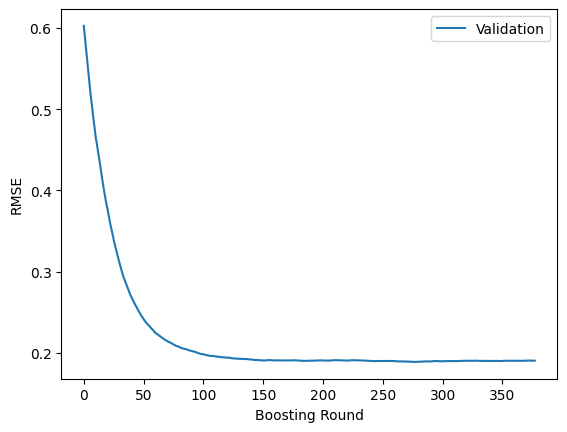

In [ ]:
import matplotlib.pyplot as plt

best_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

y_pred = best_xgb.predict(X_test)

print("R2:", metrics.r2_score(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))


results = best_xgb.evals_result()

plt.plot(results['validation_0']['rmse'], label='Validation')
plt.xlabel("Boosting Round")
plt.ylabel("RMSE")
plt.legend()
plt.show()

### optuna RandomForestRegressor

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np


def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 350),
        "max_depth": trial.suggest_int("max_depth", 10,15),
        "min_samples_split": trial.suggest_int("min_samples_split", 3,7),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["sqrt","log2",None]),
        "bootstrap": trial.suggest_categorical("bootstrap",[True,False]),
        "n_jobs": -1,
        "random_state": 42
    }

    model = RandomForestRegressor(**params)

    score = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring="r2",
        n_jobs=-1
    ).mean()

    return score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


print("Best R²:", study.best_value)
print("Best Params:", study.best_params)


best_model = RandomForestRegressor(
    **study.best_params,
    n_jobs=-1,
    random_state=42
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2:", r2_score(y_test,y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))



[I 2026-02-21 20:58:58,071] A new study created in memory with name: no-name-5b3cb076-1284-4a48-8eb6-e4c04d7a9bae
[I 2026-02-21 20:58:58,872] Trial 0 finished with value: 0.874215271727729 and parameters: {'n_estimators': 102, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.874215271727729.
[I 2026-02-21 20:58:59,806] Trial 1 finished with value: 0.8495781988345306 and parameters: {'n_estimators': 197, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.874215271727729.
[I 2026-02-21 20:59:00,695] Trial 2 finished with value: 0.8146140901908311 and parameters: {'n_estimators': 230, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.874215271727729.
[I 2026-02-21 20:59:01,212] Trial 3 finished with value: 0.8489633773020078 and 

Best R²: 0.8829504494572827
Best Params: {'n_estimators': 286, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}
R2: 0.9103785570053864
MAE: 0.13888558492203792
RMSE: 0.18515648621398736


### Final model-save & Prediction

In [852]:
data = pd.read_csv("data.csv")
data

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,0,1,1.37,11.175769,0,1,226.98,5,0,128
1,Apple,Ultrabook,8,0,1,1.34,10.776798,0,0,127.68,5,0,0
2,HP,Notebook,8,0,2,1.86,10.329964,0,0,141.21,5,0,256
3,Apple,Ultrabook,16,1,1,1.83,11.814483,0,1,220.53,7,0,512
4,Apple,Ultrabook,8,0,1,1.37,11.473111,0,1,226.98,5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,0,0,1.80,10.433929,1,1,157.35,7,0,128
1298,Lenovo,2 in 1 Convertible,16,0,0,1.30,11.288127,1,1,276.05,7,0,512
1299,Lenovo,Notebook,2,0,0,1.50,9.409365,0,0,111.94,1,0,0
1300,HP,Notebook,6,1,0,2.19,10.614153,0,0,100.45,7,1000,0


In [879]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn import metrics
import joblib

y = data['Price']
x = data.drop(['Price'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.15,random_state=2)

# X_train.shape,X_test.shape

# During training
process = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['Company','TypeName'])
    ],
    remainder='passthrough'
)

model = XGBRegressor(
        n_estimators=284,
        learning_rate=0.034,
        max_depth=7,
        subsample=0.67,
        colsample_bytree=0.606,
        random_state=42
    )

pipe = Pipeline([
    ('process', process),
    ('xgb', model)
])

pipe.fit(X_train, y_train)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))


R2 score 0.909745556540891
MAE 0.14084345863515016


In [880]:
joblib.dump(process, "encoder.pkl")
joblib.dump(model, "xgb_model.pkl")
joblib.dump(pipe, "xgb_full_pipeline.pkl")

['xgb_full_pipeline.pkl']

In [855]:
test = pd.read_csv('train-data.csv')
test

,Company,TypeName,Ram,Gpu,OpSys,Weight,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,0,1,1.37,0,1,226.98,5,0,128
1,Apple,Ultrabook,8,0,1,1.34,0,0,127.68,5,0,0
2,HP,Notebook,8,0,2,1.86,0,0,141.21,5,0,256
3,Apple,Ultrabook,16,1,1,1.83,0,1,220.53,7,0,512
4,Apple,Ultrabook,8,0,1,1.37,0,1,226.98,5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,0,0,1.80,1,1,157.35,7,0,128
1298,Lenovo,2 in 1 Convertible,16,0,0,1.30,1,1,276.05,7,0,512
1299,Lenovo,Notebook,2,0,0,1.50,0,0,111.94,1,0,0
1300,HP,Notebook,6,1,0,2.19,0,0,100.45,7,1000,0


In [883]:
encoder = joblib.load("encoder.pkl")
model = joblib.load("xgb_model.pkl")

# After encoding
X_test_trans = encoder.transform(test)
X_test_trans.shape

y_pred = model.predict(X_test_trans)

In [884]:
# Load the pipeline
loaded_pipe = joblib.load("xgb_full_pipeline.pkl")

# Make predictions on new data
y_pred_new = loaded_pipe.predict(test)

test['Prediction'] = y_pred_new

In [885]:
y_pred_new

array([11.211642, 10.866221, 10.363238, ...,  9.435881, 10.564779,
        9.855058], dtype=float32)

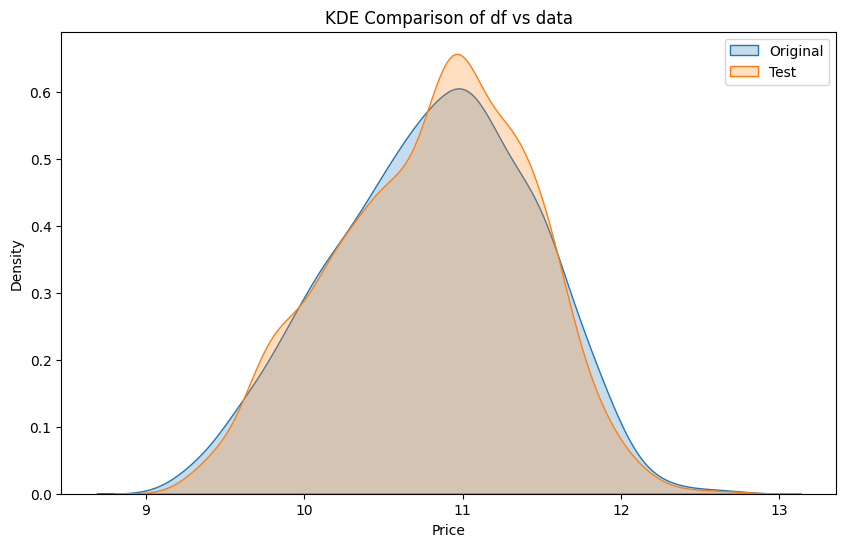

In [888]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.kdeplot(df['Price'], label='Original', fill=True, common_norm=True)
sns.kdeplot(test['Prediction'], label='Test', fill=True, common_norm=True)

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("KDE Comparison of df vs data")
plt.legend()
plt.show()

In [887]:
feature_names = loaded_pipe.named_steps['process'].get_feature_names_out()
print(feature_names)

['col_tnf__Company_Apple' 'col_tnf__Company_Asus' 'col_tnf__Company_Chuwi'
 'col_tnf__Company_Dell' 'col_tnf__Company_Fujitsu'
 'col_tnf__Company_Google' 'col_tnf__Company_HP' 'col_tnf__Company_Huawei'
 'col_tnf__Company_LG' 'col_tnf__Company_Lenovo' 'col_tnf__Company_MSI'
 'col_tnf__Company_Mediacom' 'col_tnf__Company_Microsoft'
 'col_tnf__Company_Razer' 'col_tnf__Company_Samsung'
 'col_tnf__Company_Toshiba' 'col_tnf__Company_Vero'
 'col_tnf__Company_Xiaomi' 'col_tnf__TypeName_Gaming'
 'col_tnf__TypeName_Netbook' 'col_tnf__TypeName_Notebook'
 'col_tnf__TypeName_Ultrabook' 'col_tnf__TypeName_Workstation'
 'remainder__Ram' 'remainder__Gpu' 'remainder__OpSys' 'remainder__Weight'
 'remainder__TouchScreen' 'remainder__IPS' 'remainder__PPI'
 'remainder__Cpu_Brand' 'remainder__HDD' 'remainder__SSD']
